In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  #to give whitegrid background for out plots.
%matplotlib inline


from pandas_datareader import data

from datetime import datetime

from __future__ import division

In [2]:
tech_list=['AAPL','GOOGL']
end=datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [3]:
import requests
import json
import pandas as pd

# Define the API endpoint and parameters
endpoint = "https://www.alphavantage.co/query"
symbol = "AAPL"
interval = "60min"
apikey = "A3ZI0CZH8CL32JC0"
params = {"function": "TIME_SERIES_INTRADAY", "symbol": symbol, "interval": interval, "apikey": apikey}

# Make the GET request to the API
response = requests.get(endpoint, params=params)

# Parse the response in json format
data = json.loads(response.text)

# Extract the timestamp and stock prices
timestamp = [item for item in data["Time Series (60min)"]]
open_prices = [data["Time Series (60min)"][timestamp]["1. open"] for timestamp in data["Time Series (60min)"]]
high_prices = [data["Time Series (60min)"][timestamp]["2. high"] for timestamp in data["Time Series (60min)"]]
low_prices = [data["Time Series (60min)"][timestamp]["3. low"] for timestamp in data["Time Series (60min)"]]
close_prices = [data["Time Series (60min)"][timestamp]["4. close"] for timestamp in data["Time Series (60min)"]]
volume = [data["Time Series (60min)"][timestamp]["5. volume"] for timestamp in data["Time Series (60min)"]]

# Create a DataFrame from the extracted data
df = pd.DataFrame({"Timestamp": timestamp, "Open": open_prices, "High": high_prices, "Low": low_prices, "Close": close_prices, "Volume": volume})
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Timestamp', inplace=True)
print(df)


                         Open      High       Low     Close   Volume
Timestamp                                                           
2023-01-12 20:00:00  133.1900  133.2500  133.1200  133.1200    30945
2023-01-12 19:00:00  133.2000  133.2700  133.1300  133.2000    29042
2023-01-12 18:00:00  133.2000  133.5000  133.1800  133.2010    30665
2023-01-12 17:00:00  133.3800  133.4500  133.1501  133.2200  1565831
2023-01-12 16:00:00  133.3550  133.5600  132.7700  133.3850  9061258
...                       ...       ...       ...       ...      ...
2023-01-05 05:00:00  127.0000  127.0000  125.9500  126.4000   142428
2023-01-04 20:00:00  127.0100  127.0800  126.6100  126.6500    90243
2023-01-04 19:00:00  127.5200  127.5200  126.3600  127.0000   160518
2023-01-04 18:00:00  126.1800  127.7400  126.1100  127.5400   338478
2023-01-04 17:00:00  126.3800  126.6800  126.1500  126.1700  2621531

[100 rows x 5 columns]


In [4]:
import requests
import json
import pandas as pd

# Define the API endpoint and parameters
endpoint = "https://www.alphavantage.co/query"
symbol = "GOOGL"
interval = "60min"
apikey = "A3ZI0CZH8CL32JC0"
params = {"function": "TIME_SERIES_INTRADAY", "symbol": symbol, "interval": interval, "apikey": apikey}

# Make the GET request to the API
response = requests.get(endpoint, params=params)

# Parse the response in json format
data = json.loads(response.text)

# Extract the timestamp and stock prices
timestamp = [item for item in data["Time Series (60min)"]]
open_prices = [data["Time Series (60min)"][timestamp]["1. open"] for timestamp in data["Time Series (60min)"]]
high_prices = [data["Time Series (60min)"][timestamp]["2. high"] for timestamp in data["Time Series (60min)"]]
low_prices = [data["Time Series (60min)"][timestamp]["3. low"] for timestamp in data["Time Series (60min)"]]
close_prices = [data["Time Series (60min)"][timestamp]["4. close"] for timestamp in data["Time Series (60min)"]]
volume = [data["Time Series (60min)"][timestamp]["5. volume"] for timestamp in data["Time Series (60min)"]]

# Create a DataFrame from the extracted data
df = pd.DataFrame({"Timestamp": timestamp, "Open": open_prices, "High": high_prices, "Low": low_prices, "Close": close_prices, "Volume": volume})
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Timestamp', inplace=True)
print(df)


                        Open     High      Low    Close   Volume
Timestamp                                                       
2023-01-12 20:00:00  91.1700  91.2500  91.1200  91.2100     9515
2023-01-12 19:00:00  91.1900  91.2400  91.0600  91.1900     9113
2023-01-12 18:00:00  91.0300  91.2700  91.0300  91.1898    79841
2023-01-12 17:00:00  91.1300  91.1700  90.9300  91.0000  1168213
2023-01-12 16:00:00  91.3433  91.3750  90.7400  91.1300  4033147
...                      ...      ...      ...      ...      ...
2023-01-05 05:00:00  87.7700  88.1100  87.4800  88.0200    12046
2023-01-04 20:00:00  87.9500  88.0300  87.7600  87.8800    28316
2023-01-04 19:00:00  88.1100  88.1100  87.9000  88.0000   125933
2023-01-04 18:00:00  88.0388  88.2257  87.9700  88.1200    27522
2023-01-04 17:00:00  88.0800  88.6232  87.9000  88.0200   914118

[100 rows x 5 columns]


In [5]:
import yfinance as yf

# Define the stock symbol
stock_symbol = "AAPL"

# Get the historical data for the stock with the latest timestamp
stock_data = yf.download(stock_symbol, interval = "1d", group_by = 'ticker')

# Print the data
print(stock_data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099874   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094663   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087715   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089886   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092492   
...                ...         ...         ...         ...         ...   
2023-01-06  126.010002  130.289993  124.889999  129.619995  129.619995   
2023-01-09  130.470001  133.410004  129.889999  130.149994  130.149994   
2023-01-10  130.259995  131.259995  128.119995  130.729996  130.729996   
2023-01-11  131.250000  133.509995  130.460007  133.490005  133.490005   
2023-01-12  133.880005  134.259995  131.440

[*********************100%***********************]  1 of 1 completed


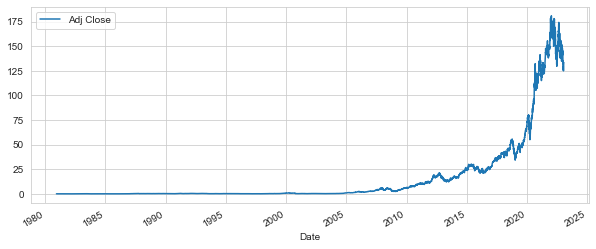

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbol
stock_symbol = "AAPL"

# Get the historical data for the stock
stock_data = yf.download(stock_symbol)

# Plot the adjusted close price
stock_data['Adj Close'].plot(legend=True, figsize=(10,4))
plt.show()

[*********************100%***********************]  1 of 1 completed


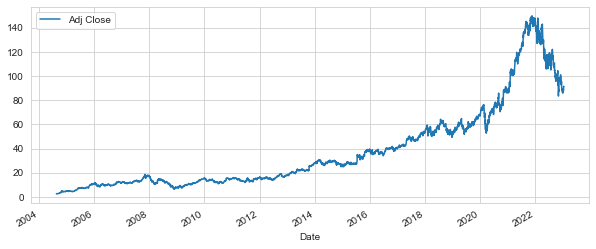

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbol
stock_symbol = "GOOGL"

# Get the historical data for the stock
stock_data = yf.download(stock_symbol)

# Plot the adjusted close price
stock_data['Adj Close'].plot(legend=True, figsize=(10,4))
plt.show()

In [8]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

class ScriptData:
    def __init__(self, script_name: str, api_key: str):
        self.script_name = script_name
        self.api_key = api_key
        self.ts = TimeSeries(key=api_key, output_format='pandas')
        
    def fetch_intraday_data(self):
        data, meta_data = self.ts.get_intraday(symbol=self.script_name, interval='1min', outputsize='full')
        return data

In [9]:
script_data = ScriptData(script_name='AAPL', api_key='A3ZI0CZH8CL32JC0')
df = script_data.fetch_intraday_data()

In [10]:
script_data = ScriptData(script_name='GOOGL', api_key='A3ZI0CZH8CL32JC0')
df = script_data.fetch_intraday_data()

In [11]:
import requests
import pandas as pd

class ScriptData:
    def __init__(self, api_key: str):
        self.api_key = api_key
        
    def fetch_intraday_data(self, script: str):
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}"
        data = requests.get(url).json()
        self.intraday_data = pd.DataFrame(data['Time Series (5min)']).transpose()

In [12]:
import pandas as pd
import requests

class ScriptData:
    
    def __init__(self, api_key: str):
        self.api_key = api_key
        
    def fetch_intraday_data(self, script: str):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}'
        data = requests.get(url).json()
        self.intraday_data = data['Time Series (5min)']
        
    def convert_intraday_data(self):
        df = pd.DataFrame(self.intraday_data)
        df = df.transpose()
        df.index = pd.to_datetime(df.index)
        df.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'}, inplace=True)
        df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)
        self.df = df
        
    def get_data(self):
        return self.df

In [13]:
sd = ScriptData(api_key='A3ZI0CZH8CL32JC0')
sd.fetch_intraday_data('AAPL')
sd.convert_intraday_data()
df = sd.get_data()

In [14]:
import pandas as pd
import requests

class ScriptData:
    def __init__(self):
        self.api_key = "A3ZI0CZH8CL32JC0"

    def fetch_intraday_data(self, script: str):
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}"
        self.intraday_data = requests.get(url).json()["Time Series (5min)"]

    def convert_intraday_data(self):
        timestamp = []
        open_price = []
        high_price = []
        low_price = []
        close_price = []
        volume = []

        for key, value in self.intraday_data.items():
            timestamp.append(pd.to_datetime(key))
            open_price.append(float(value['1. open']))
            high_price.append(float(value['2. high']))
            low_price.append(float(value['3. low']))
            close_price.append(float(value['4. close']))
            volume.append(int(value['5. volume']))

        self.df = pd.DataFrame({"timestamp": timestamp, "open": open_price, "high": high_price,
                               "low": low_price, "close": close_price, "volume": volume})

# Usage
script_data = ScriptData()
script_data.fetch_intraday_data("AAPL")
script_data.convert_intraday_data()
print(script_data.df)

             timestamp    open     high       low     close  volume
0  2023-01-12 20:00:00  133.16  133.170  133.1200  133.1200    5525
1  2023-01-12 19:55:00  133.16  133.190  133.1500  133.1900    5074
2  2023-01-12 19:50:00  133.18  133.180  133.1500  133.1500    1820
3  2023-01-12 19:45:00  133.20  133.200  133.1600  133.1799    1960
4  2023-01-12 19:40:00  133.23  133.230  133.2000  133.2100    1413
..                 ...     ...      ...       ...       ...     ...
95 2023-01-12 11:50:00  132.84  132.910  132.5800  132.6700  580392
96 2023-01-12 11:45:00  132.55  132.920  132.4556  132.8500  633580
97 2023-01-12 11:40:00  132.21  132.670  132.2000  132.5450  538508
98 2023-01-12 11:35:00  132.42  132.475  132.0700  132.2219  511626
99 2023-01-12 11:30:00  132.64  132.680  132.1700  132.4150  549275

[100 rows x 6 columns]


In [15]:
import pandas as pd
import requests

class ScriptData:
    def __init__(self):
        self.api_key = "A3ZI0CZH8CL32JC0"

    def fetch_intraday_data(self, script: str):
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}"
        self.intraday_data = requests.get(url).json()["Time Series (5min)"]

    def convert_intraday_data(self):
        timestamp = []
        open_price = []
        high_price = []
        low_price = []
        close_price = []
        volume = []

        for key, value in self.intraday_data.items():
            timestamp.append(pd.to_datetime(key))
            open_price.append(float(value['1. open']))
            high_price.append(float(value['2. high']))
            low_price.append(float(value['3. low']))
            close_price.append(float(value['4. close']))
            volume.append(int(value['5. volume']))

        self.df = pd.DataFrame({"timestamp": timestamp, "open": open_price, "high": high_price,
                               "low": low_price, "close": close_price, "volume": volume})

# Usage
script_data = ScriptData()
script_data.fetch_intraday_data("GOOGL")
script_data.convert_intraday_data()
print(script_data.df)

             timestamp   open     high      low    close  volume
0  2023-01-12 20:00:00  91.16  91.2100  91.1200  91.2100    2217
1  2023-01-12 19:55:00  91.16  91.1900  91.1600  91.1900    1129
2  2023-01-12 19:50:00  91.16  91.2000  91.1600  91.2000    1236
3  2023-01-12 19:45:00  91.25  91.2500  91.1600  91.1600    1662
4  2023-01-12 19:40:00  91.25  91.2500  91.2499  91.2499    1171
..                 ...    ...      ...      ...      ...     ...
95 2023-01-12 11:30:00  91.04  91.1350  90.8000  91.0200  267965
96 2023-01-12 11:25:00  91.04  91.1758  90.9300  91.0300  255796
97 2023-01-12 11:20:00  91.03  91.1900  90.9800  91.0500  259663
98 2023-01-12 11:15:00  90.96  91.0500  90.6700  91.0300  329936
99 2023-01-12 11:10:00  90.79  91.0400  90.7869  90.9643  330886

[100 rows x 6 columns]


In [16]:
import pandas as pd
import requests

class ScriptData:
    def __init__(self):
        self.api_key = "A3ZI0CZH8CL32JC0"
        self.intraday_data = {}
        
    def fetch_intraday_data(self, script: str):
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}"
        self.intraday_data[script] = requests.get(url).json()
        
    def convert_intraday_data(self, script: str):
        timestamp = []
        open_price = []
        high_price = []
        low_price = []
        close_price = []
        volume = []
        for key, value in self.intraday_data[script]['Time Series (5min)'].items():
            timestamp.append(pd.to_datetime(key))
            open_price.append(float(value['1. open']))
            high_price.append(float(value['2. high']))
            low_price.append(float(value['3. low']))
            close_price.append(float(value['4. close']))
            volume.append(int(value['5. volume']))
        self.intraday_data[script] = pd.DataFrame({
            'timestamp': timestamp,
            'open': open_price,
            'high': high_price,
            'low': low_price,
            'close': close_price,
            'volume': volume
        })
        
    def __getitem__(self, script: str):
        if script not in self.intraday_data:
            self.fetch_intraday_data(script)
            self.convert_intraday_data(script)
        return self.intraday_data[script]
    
    def __setitem__(self, script: str, value):
        self.intraday_data[script] = value
        
    def __contains__(self, script: str):
        return script in self.intraday_data

In [17]:
script_data = ScriptData()
script_data['AAPL']

,timestamp,open,high,low,close,volume
0,2023-01-12 20:00:00,133.16,133.170,133.1200,133.1200,5525
1,2023-01-12 19:55:00,133.16,133.190,133.1500,133.1900,5074
2,2023-01-12 19:50:00,133.18,133.180,133.1500,133.1500,1820
3,2023-01-12 19:45:00,133.20,133.200,133.1600,133.1799,1960
4,2023-01-12 19:40:00,133.23,133.230,133.2000,133.2100,1413
...,...,...,...,...,...,...
95,2023-01-12 11:50:00,132.84,132.910,132.5800,132.6700,580392
96,2023-01-12 11:45:00,132.55,132.920,132.4556,132.8500,633580
97,2023-01-12 11:40:00,132.21,132.670,132.2000,132.5450,538508
98,2023-01-12 11:35:00,132.42,132.475,132.0700,132.2219,511626


In [18]:
'AAPL' in script_data

True

In [19]:
script_data = ScriptData()
script_data['GOOGL']

,timestamp,open,high,low,close,volume
0,2023-01-12 20:00:00,91.16,91.2100,91.1200,91.2100,2217
1,2023-01-12 19:55:00,91.16,91.1900,91.1600,91.1900,1129
2,2023-01-12 19:50:00,91.16,91.2000,91.1600,91.2000,1236
3,2023-01-12 19:45:00,91.25,91.2500,91.1600,91.1600,1662
4,2023-01-12 19:40:00,91.25,91.2500,91.2499,91.2499,1171
...,...,...,...,...,...,...
95,2023-01-12 11:30:00,91.04,91.1350,90.8000,91.0200,267965
96,2023-01-12 11:25:00,91.04,91.1758,90.9300,91.0300,255796
97,2023-01-12 11:20:00,91.03,91.1900,90.9800,91.0500,259663
98,2023-01-12 11:15:00,90.96,91.0500,90.6700,91.0300,329936


In [20]:
'GOOGL' in script_data

True

In [21]:
import pandas as pd

def indicator1(df: pd.DataFrame, timeperiod: int) -> pd.DataFrame:
    sma = df['close'].rolling(timeperiod).mean()
    result_df = pd.DataFrame({'timestamp': df.index, 'indicator1': sma})
    return result_df

In [22]:
df = script_data['GOOGL']
indicator1_df = indicator1(df, 14)

In [23]:
import pandas as pd

def indicator1(df, timeperiod):
    df_indicator = df.copy()
    df_indicator['indicator'] = df_indicator['close'].rolling(window=timeperiod).mean()
    return df_indicator[['timestamp', 'indicator']]

In [24]:
indicator1(script_data['GOOGL'],timeperiod=5)

,timestamp,indicator
0,2023-01-12 20:00:00,NaN
1,2023-01-12 19:55:00,NaN
2,2023-01-12 19:50:00,NaN
3,2023-01-12 19:45:00,NaN
4,2023-01-12 19:40:00,91.20198
...,...,...
95,2023-01-12 11:30:00,90.98500
96,2023-01-12 11:25:00,91.01100
97,2023-01-12 11:20:00,90.99900
98,2023-01-12 11:15:00,91.01700


In [25]:
indicator1(script_data['AAPL'],timeperiod=5)

,timestamp,indicator
0,2023-01-12 20:00:00,NaN
1,2023-01-12 19:55:00,NaN
2,2023-01-12 19:50:00,NaN
3,2023-01-12 19:45:00,NaN
4,2023-01-12 19:40:00,133.16998
...,...,...
95,2023-01-12 11:50:00,132.92036
96,2023-01-12 11:45:00,132.85636
97,2023-01-12 11:40:00,132.77500
98,2023-01-12 11:35:00,132.60338


In [33]:
class ScriptData:
    def __init__(self):
        self.api_key = "A3ZI0CZH8CL32JC0"
        
    def fetch_intraday_data(self, script):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}'
        self.intraday_data = requests.get(url).json()
    
    def convert_intraday_data(self, script):
        timestamp = []
        open_price = []
        high_price = []
        low_price = []
        close_price = []
        volume = []
        for key, value in self.intraday_data[f'Time Series (5min)'] .items():
            timestamp.append(pd.to_datetime(key))
            open_price.append(float(value['1. open']))
            high_price.append(float(value['2. high']))
            low_price.append(float(value['3. low']))
            close_price.append(float(value['4. close']))
            volume.append(int(value['5. volume']))
        df = pd.DataFrame({'timestamp':timestamp, 'open':open_price, 'high':high_price, 'low':low_price, 'close':close_price, 'volume':volume})
        return df

In [34]:
strategy = Strategy('GOOGL')
print(strategy.close_data)

0     91.2100
1     91.1900
2     91.2000
3     91.1600
4     91.2499
       ...   
95    91.0200
96    91.0300
97    91.0500
98    91.0300
99    90.9643
Name: close, Length: 100, dtype: float64


In [35]:
strategy = Strategy('AAPL')
print(strategy.close_data)

0     133.1200
1     133.1900
2     133.1500
3     133.1799
4     133.2100
        ...   
95    132.6700
96    132.8500
97    132.5450
98    132.2219
99    132.4150
Name: close, Length: 100, dtype: float64


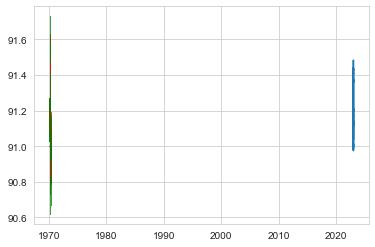

In [32]:
from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt

class Strategy:
    def __init__(self, script_name):
        # Initialize script_data, df, close_data, and indicator_df
        self.script_data = ScriptData()
        self.script_data.fetch_intraday_data(script_name)
        self.df = self.script_data.convert_intraday_data(script_name)
        self.close_data = self.df['close']
        self.indicator_df = indicator1(self.df, 5)

    def plot_candlestick(self):
        # Create subplots
        fig, ax = plt.subplots()

        # Plot candlestick chart of df
        candlestick2_ohlc(ax, self.df['open'], self.df['high'], self.df['low'], self.df['close'], width=0.6, colorup='g', colordown='r')
        ax.plot(self.indicator_df['timestamp'], self.indicator_df['indicator'])
        plt.show()

# Initialize the Strategy class
strategy = Strategy('GOOGL')
# Plot the candlestick chart
strategy.plot_candlestick()